In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gunnels = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv")
print(gunnels)

      rownames  Gunnel  Time  Fromlow  Slope   Rw  Amphiso  Subst  Pool  \
0            1       0   786      190     10  0.1        0      3     0   
1            2       0   794      182     10  0.0        0      3     0   
2            3       0   798      178     20  0.0        0      1     0   
3            4       0   800      176     70  0.3        0      1     0   
4            5       0   804      172     40  0.3        0      1     0   
...        ...     ...   ...      ...    ...  ...      ...    ...   ...   
1587      1588       0   782      134     10  1.0        0      1     0   
1588      1589       0   784      136     10  1.0        0      1     1   
1589      1590       0   790      142     10  1.0        0      1     0   
1590      1591       0   793      145      0  1.0        1      7     0   
1591      1592       0   796      148     20  1.0        0      1     1   

      Water  Cobble  
0         0       0  
1         0       0  
2         0       0  
3         1

In [4]:
gunnels.describe()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,796.500000,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,459.715129,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,1.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,398.750000,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,796.500000,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1194.250000,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1592.000000,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


In [31]:
gunnels['Amphiso'].value_counts() # Close enough to a categorical data

Amphiso
0    1186
2     169
1     165
3      52
4      20
Name: count, dtype: int64

In [32]:
gunnels['Amphiso'].value_counts().sort_index()

Amphiso
0    1186
1     165
2     169
3      52
4      20
Name: count, dtype: int64

Text(0, 0.5, 'Number of gunnels')

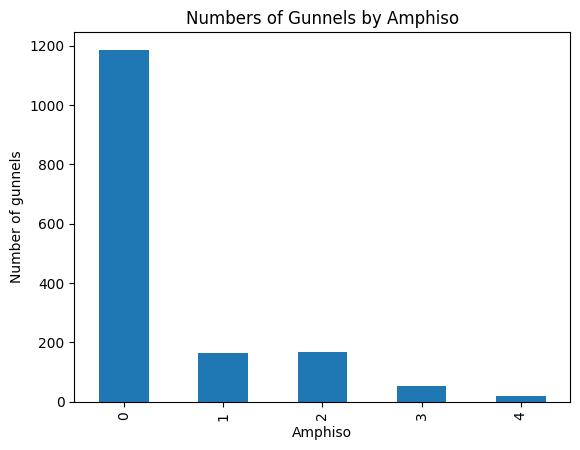

In [33]:
gunnels['Amphiso'].value_counts().sort_index().plot(kind='bar')
plt.title('Numbers of Gunnels by Amphiso')
plt.xlabel('Amphiso')
plt.ylabel('Number of gunnels')

In [36]:
gunnels['Time'].value_counts()

Time
827    12
825    10
788    10
648    10
632    10
       ..
966     1
969     1
970     1
973     1
683     1
Name: count, Length: 542, dtype: int64

/files/Programming/College/EDA/EDA-DA/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


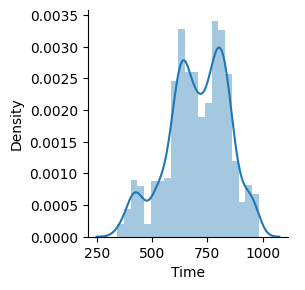

In [38]:
sns.FacetGrid(gunnels).map(sns.distplot,"Time").add_legend()

/files/Programming/College/EDA/EDA-DA/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


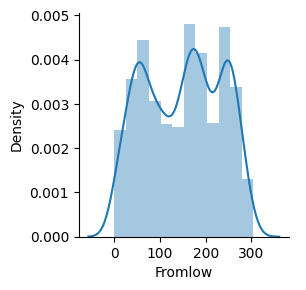

In [41]:
sns.FacetGrid(gunnels).map(sns.distplot,"Fromlow").add_legend()

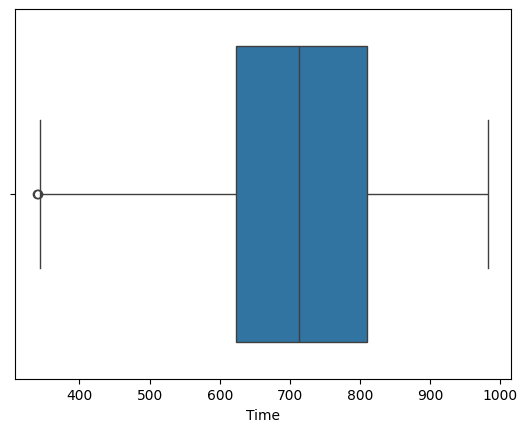

In [43]:
sns.boxplot(x="Time", data=gunnels)
plt.show() # Outliers exist

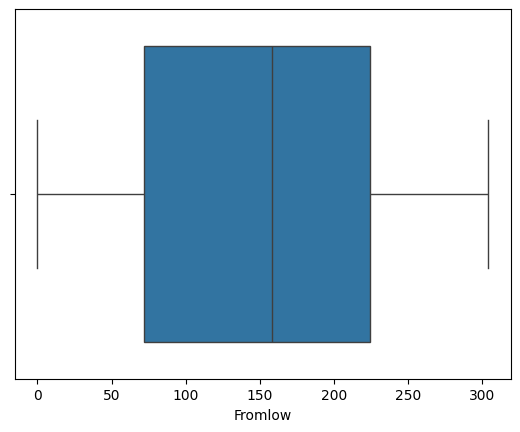

In [44]:
sns.boxplot(x="Fromlow", data=gunnels)
plt.show() # No outliers

Text(0, 0.5, 'Fromlow')

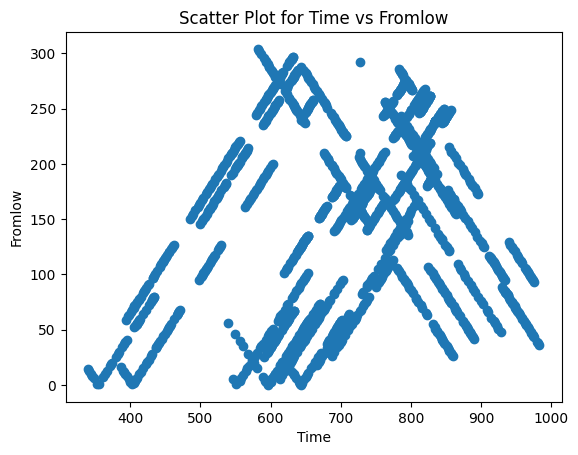

In [50]:
plt.scatter(gunnels["Time"], gunnels["Fromlow"])
plt.title("Scatter Plot for Time vs Fromlow")
plt.xlabel('Time')
plt.ylabel('Fromlow')

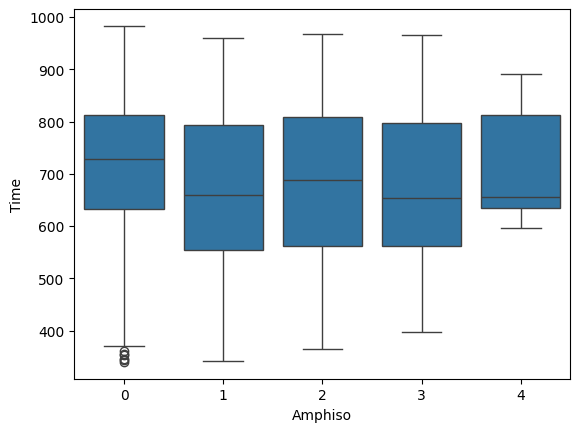

In [54]:
sns.boxplot(x="Amphiso",y="Time",data=gunnels)
plt.show() # Lots of outliers when Amphiso=0

<Axes: xlabel='Water', ylabel='Fromlow'>

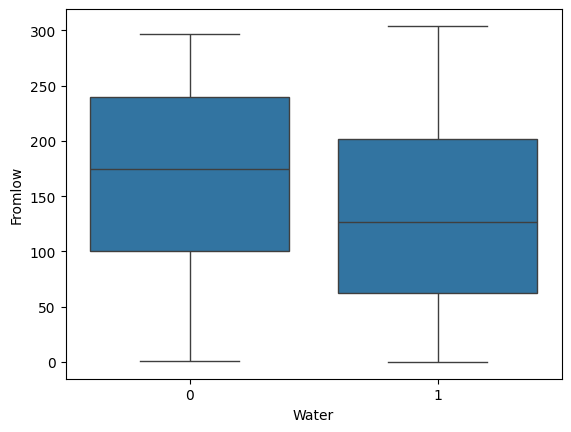

In [62]:
sns.boxplot(x="Water", y="Fromlow",data=gunnels)

<Axes: xlabel='Pool', ylabel='Fromlow'>

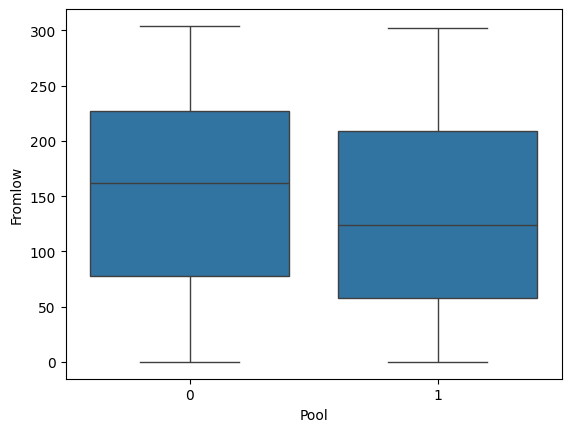

In [63]:
sns.boxplot(x="Pool", y="Fromlow",data=gunnels) # Very similar to previous graph

In [65]:
correlation = gunnels.corr(method='pearson', numeric_only=True)
correlation

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
rownames,1.000000,0.049300,0.322613,0.021956,-0.201555,0.080318,-0.151166,0.014867,0.157931,0.101224,0.030921
Gunnel,0.049300,1.000000,-0.147345,-0.237442,-0.003742,0.059315,0.092853,0.167311,0.075823,0.085071,0.213397
Time,0.322613,-0.147345,1.000000,0.215593,-0.076922,0.047812,-0.094952,-0.045537,0.140445,0.072215,0.008813
Fromlow,0.021956,-0.237442,0.215593,1.000000,0.090586,-0.348612,-0.118838,-0.061721,-0.098623,-0.187175,-0.064347
Slope,-0.201555,-0.003742,-0.076922,0.090586,1.000000,0.019566,-0.078461,-0.250251,-0.068931,-0.065498,-0.124665
Rw,0.080318,0.059315,0.047812,-0.348612,0.019566,1.000000,0.230164,-0.118785,0.107987,0.344206,0.075399
Amphiso,-0.151166,0.092853,-0.094952,-0.118838,-0.078461,0.230164,1.000000,0.159754,-0.014739,0.219490,0.220282
Subst,0.014867,0.167311,-0.045537,-0.061721,-0.250251,-0.118785,0.159754,1.000000,-0.049367,-0.043498,0.883061
Pool,0.157931,0.075823,0.140445,-0.098623,-0.068931,0.107987,-0.014739,-0.049367,1.000000,0.488495,0.045803
Water,0.101224,0.085071,0.072215,-0.187175,-0.065498,0.344206,0.219490,-0.043498,0.488495,1.000000,0.084158


<Axes: >

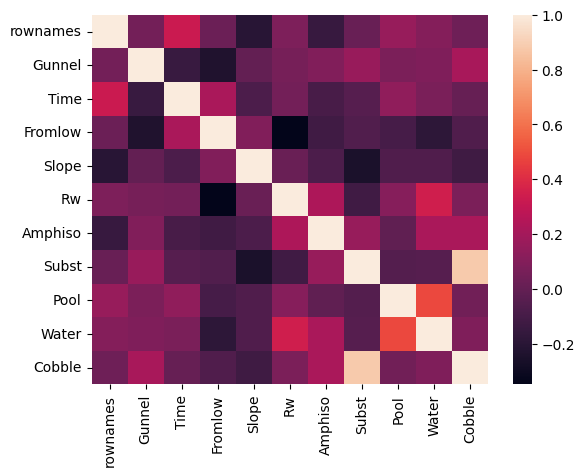

In [66]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns) # Water and Pool do have correlation, but Cobble and Subst have more correlation